In [1]:
import requests
from bs4 import  BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collecting and Cleaning

In [91]:
# link
url = "https://www.carwale.com/honda-cars/amaze-2nd-gen/"
page = requests.get(url)
soup = BeautifulSoup(page.text)

# Variant
name = soup.find_all(r"div",class_ = "o-eO")

variant = []
for i in name:
    variant.append(i.text)

# All features
feature = soup.find_all(r"span",class_ = "o-jL o-j3")

features = []
for i in feature:
    features.append(i.text)


cc = []
fuel_type = []
transmission = []
mileage = []
bhp = []
for i in features:
    cc.append(i.split(",")[0].strip())
    fuel_type.append(i.split(",")[1].strip())
    transmission.append(i.split(",")[2].strip())
    mileage.append(i.split(",")[3].strip())
    bhp.append(i.split(",")[4].strip())


# Price
cost = soup.find_all(r"div",class_ = "o-j5 o-js o-c o-eQ o-jJ")

price = []
for i in cost:
    a = re.findall(r"\d+\.\d+",i.text)[0]
    price.append(float(a))

   

In [93]:
variant = variant[0:11]
print(len(variant))
print(len(cc))
print(len(fuel_type))
print(len(price))
print(len(transmission))
#print(len(mileage))
print(len(bhp))
variant

11
11
11
11
11
11


['Amaze 2nd Gen E 1.2 Petrol MT',
 'Amaze 2nd Gen S 1.2 Petrol MT',
 'Amaze 2nd Gen S 1.2 Petrol MT 2024',
 'Amaze 2nd Gen S 1.2 Petrol CVT',
 'Amaze 2nd Gen S 1.2 Petrol CVT 2024',
 'Amaze 2nd Gen VX 1.2 Petrol MT',
 'Amaze 2nd Gen VX 1.2 Petrol MT 2024',
 'Amaze 2nd Gen Elite Edition MT',
 'Amaze 2nd Gen VX 1.2 Petrol CVT',
 'Amaze 2nd Gen VX 1.2 Petrol CVT 2024',
 'Amaze 2nd Gen Elite Edition CVT']

In [94]:
# removing brezza from variant and just keeping the variant
variant_ = []
for i in variant:
    variant_.append(i.replace("Amaze 2nd Gen ",""))

# creating brezza column
car_name = []
for i in range(0,11):
    car_name.append("Amaze 2nd Gen")

# creating rating column
rating = []
for i in range(0,11):
    rating.append(4.3)

# creating brand column
brand = []
for i in range(0,11):
    brand.append("Honda")

    
# mileage = []
# for i in range(0,17):
#      mileage.append(0)
    
    

In [95]:
dic = {"brand":brand,
       "car_name":car_name,
       "variant":variant_,
       "cc":cc,
       "fuel_type":fuel_type,
       "price in lakh":price,
       "transmission":transmission,
       "mileage kmpl/kmkg(cng)":mileage,
       "bhp":bhp,
       "rating":rating}
Amaze_2nd_Gen = pd.DataFrame(dic)

In [101]:
Amaze_2nd_Gen

,brand,car_name,variant,cc,fuel_type,price in lakh,transmission,mileage kmpl/kmkg(cng),bhp,rating
0,Honda,Amaze 2nd Gen,E 1.2 MT,1199,Petrol,7.23,Manual,18.6,89,4.3
1,Honda,Amaze 2nd Gen,S 1.2 MT,1199,Petrol,7.60,Manual,18.6,89,4.3
2,Honda,Amaze 2nd Gen,S 1.2 MT 2024,1199,Petrol,7.66,Manual,18.6,89,4.3
3,Honda,Amaze 2nd Gen,S 1.2 CVT,1199,Petrol,8.50,Automatic (CVT),18.3,89,4.3
4,Honda,Amaze 2nd Gen,S 1.2 CVT 2024,1199,Petrol,8.56,Automatic (CVT),18.3,89,4.3
5,Honda,Amaze 2nd Gen,VX 1.2 MT,1199,Petrol,9.02,Manual,18.6,89,4.3
6,Honda,Amaze 2nd Gen,VX 1.2 MT 2024,1199,Petrol,9.07,Manual,18.6,89,4.3
7,Honda,Amaze 2nd Gen,Elite Edition MT,1199,Petrol,9.17,Manual,18.6,89,4.3
8,Honda,Amaze 2nd Gen,VX 1.2 CVT,1199,Petrol,9.84,Automatic (CVT),18.3,89,4.3
9,Honda,Amaze 2nd Gen,VX 1.2 CVT 2024,1199,Petrol,9.89,Automatic (CVT),18.3,89,4.3


In [97]:
Amaze_2nd_Gen["cc"] = Amaze_2nd_Gen["cc"].apply(lambda x: re.sub(r"cc",'',x))

In [98]:
Amaze_2nd_Gen["mileage kmpl/kmkg(cng)"] = Amaze_2nd_Gen["mileage kmpl/kmkg(cng)"].apply(lambda x: re.sub(r"kmpl",'',x))

In [99]:
Amaze_2nd_Gen["bhp"] = Amaze_2nd_Gen["bhp"].apply(lambda x: re.sub(r"bhp",'',x))


In [100]:
Amaze_2nd_Gen['variant']=Amaze_2nd_Gen['variant'].apply(lambda x:re.sub(" Petrol",'',x))

In [110]:
lst3.to_csv(r"/Users/ashokkarre/Downloads/cars/lst3.csv",index = False)

In [142]:
condition = (Astor["fuel_type"] == "Petrol") & (Astor["transmission"] == "Automatic (CVT)")


In [143]:
Astor.loc[condition,"mileage kmpl/kmkg(cng)"] = 14.82

In [2]:
Astor.loc[condition]


In [173]:
condition = (XUV700["fuel_type"] == "Diesel") & (XUV700["transmission"] == "Automatic (TC)")
XUV700.loc[condition,"mileage kmpl/kmkg(cng)"] = 14.77
XUV700.loc[condition]

In [111]:

All9 = pd.read_csv(r"/Users/ashokkarre/Downloads/cars/All9.csv")
 lst3 = pd.read_csv(r"/Users/ashokkarre/Downloads/cars/lst3.csv")



In [112]:
#Car_Data = pd.concat([All9,lst3],axis = 0).reset_index(drop = True)


In [ ]:
Maruti_Suzuki.to_csv("/Users/ashokkarre/Downloads/cars/Maruti_Suzuki.csv")

In [ ]:
XUV_3XO['variant']=XUV_3XO['variant'].apply(lambda x:re.sub(" Diesel",'',x))

In [2]:
app = []
for i in range(0,4):
    if i == 3:
        a = features[i].split()
        print(a)
        a.insert(5,"26.49 km/kg,")
        #a.insert(4,",182 bhp")
       
        print(a)
        b = ''
        b = b.join(a)
        #b = b.replace("Automatic(TC)","Automatic (TC)")
        
        print(b)
        app.append(b)
        
    else:
         app.append(features[i])

# Analysis and Visualization

In [2]:
Car = pd.read_csv(r"/Users/ashokkarre/Downloads/cars/Car_Data.csv")


In [7]:
# Info
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1369 non-null   object 
 1   Model                   1369 non-null   object 
 2   Variant                 1369 non-null   object 
 3   CC                      1369 non-null   float64
 4   Fuel_Type               1369 non-null   object 
 5   Price_in_lakh           1369 non-null   float64
 6   Transmission            1369 non-null   object 
 7   Mileage_kmpl/kmkg(cng)  1369 non-null   float64
 8   Bhp                     1369 non-null   float64
 9   Rating                  1369 non-null   float64
dtypes: float64(5), object(5)
memory usage: 107.1+ KB


In [250]:
# Unique value showing
Car["Brand"].unique()

array(['Maruti Suzuki', 'Mahindra', 'TATA', 'Hyundai', 'Toyota', 'Kia',
       'Skoda', 'BMW', 'Benz', 'Land Rover', 'MG', 'Honda'], dtype=object)

In [36]:
# Describe
Car.describe()

,CC,Price_in_lakh,Mileage_kmpl/kmkg(cng),Bhp,Rating
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,1406.787436,17.428795,43.914332,125.287290,4.560628
std,532.529534,12.508804,98.585068,44.770362,0.186707
min,17.300000,4.230000,9.500000,41.000000,2.600000
25%,1197.000000,10.150000,16.000000,89.000000,4.500000
50%,1462.000000,14.830000,18.200000,114.000000,4.600000
75%,1498.000000,19.990000,20.650000,158.000000,4.700000
max,2999.000000,99.400000,663.000000,421.000000,5.000000


In [37]:
Car.head()

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating
0,Maruti Suzuki,Fronx,Sigma 1.2L MT,1197.0,Petrol,7.54,Manual,21.79,89.0,4.5
1,Maruti Suzuki,Fronx,Delta 1.2L MT,1197.0,Petrol,8.40,Manual,21.79,89.0,4.5
2,Maruti Suzuki,Fronx,Sigma 1.2 CNG,1197.0,CNG,8.49,Manual,28.51,76.0,4.5
3,Maruti Suzuki,Fronx,Delta Plus 1.2L MT,1197.0,Petrol,8.80,Manual,21.79,89.0,4.5
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5


# 1). Which brands are offering the widest product portfolio in terms of price, fuel types, and transmission options?
## Helps understand product diversity and brand competitiveness.

In [45]:
max_price = Car.groupby("Brand")["Price_in_lakh"].max()

# Extracting maximum price for each brand
print(max_price)
print(max_price.index)
print(max_price.values)

array([97.9 , 99.4 , 20.89, 46.05, 65.97, 87.9 , 46.24, 25.89, 29.22,
       48.69, 27.25, 51.94])

In [ ]:
# Extract minimum price for each brand
min_price = Car.groupby("Brand")["Price_in_lakh"].min()
print(min_price)
print(min_price.index)
print(min_price.values)

In [51]:
# calculating price range for for Price column
price_range = (max_price-min_price).values
print(price_range)

In [150]:
#EXtracting fuel count for each brand
a = Car.groupby("Brand")["Fuel_Type"].unique()
print(a)
fuel_count = []
for i in a:
    fuel_count.append(len(i))
print(fuel_count)

Brand
BMW                                     [Diesel, Petrol, Electric]
Benz             [Mild Hybrid(Electric + Petrol), Petrol, Diese...
Honda                         [Petrol, Hybrid (Electric + Petrol)]
Hyundai                            [Petrol, Diesel, CNG, Electric]
Kia                                     [Petrol, Diesel, Electric]
Land Rover       [Petrol, Diesel, Mild Hybrid(Electric + Petrol...
MG                                      [Electric, Petrol, Diesel]
Mahindra                                          [Petrol, Diesel]
Maruti Suzuki            [Petrol, CNG, Hybrid (Electric + Petrol)]
Skoda                                                     [Petrol]
TATA                               [Petrol, CNG, Diesel, Electric]
Toyota           [Petrol, CNG, Hybrid (Electric + Petrol), Dies...
Name: Fuel_Type, dtype: object


In [254]:
min_price.index

Index(['BMW', 'Benz', 'Honda', 'Hyundai', 'Kia', 'Land Rover', 'MG',
       'Mahindra', 'Maruti Suzuki', 'Skoda', 'TATA', 'Toyota'],
      dtype='object', name='Brand')

In [110]:
# Transmission count for each brand
transmission_unique = Car.groupby("Brand")["Transmission"].unique()
transmission_count = []
for i in transmission_unique:
    transmission_count.append(len(i))
print(transmission_count)

In [ ]:
# Extracting variant counts for each brand
variant_unique = Car.groupby("Brand")["Variant"].unique()
variant_count = []
for i in variant_unique:
    variant_count.append(len(i))
print(variant_count)

In [136]:
dic = {"brand":min_price.index,
      "price_range_lakh":price_range,
      "fuel_type":fuel_count,
      "transmission":transmission_count,
      "variant":variant_count}

In [138]:
portfolio = pd.DataFrame(dic)

In [140]:
#portfolio.to_csv("./Downloads/portfolio.csv")

In [141]:
portfolio

,brand,price_range_lakh,fuel_type,transmission,variant
0,BMW,53.50,3,4,23
1,Benz,53.35,4,3,15
2,Honda,13.66,2,4,39
3,Hyundai,40.07,4,7,239
4,Kia,57.97,3,8,50
5,Land Rover,20.00,4,1,6
6,MG,40.07,3,4,101
7,Mahindra,17.90,2,4,150
8,Maruti Suzuki,24.99,3,5,141
9,Skoda,40.44,1,3,65


In [206]:
# plt.subplot(2,2,1)
# sns.barplot(data = portfolio,x = "brand",y = "fuel_type",color = "orange")
# plt.xticks(rotation = 90)

# plt.subplot(2,2,2)
# sns.barplot(data = portfolio,x = "brand",y = "price_range_lakh",color = "green")
# plt.xticks(rotation = 90)

# plt.subplot(2,2,3)
# sns.barplot(data = portfolio,x = "brand",y = "transmission",color = "purple")
# plt.xticks(rotation = 90)

# plt.subplot(2,2,4)
# sns.barplot(data = portfolio,x = "brand",y = "variant",color = "violet")
# plt.xticks(rotation = 90)

# plt.tight_layout()
# plt.show()

In [199]:
# Normalizing price column
port_price_normal = portfolio["price_range_lakh"].apply(lambda x:(x - portfolio["price_range_lakh"].min())/(portfolio["price_range_lakh"].max()-portfolio["price_range_lakh"].min()))      
print(port_price_normal)

0     0.899120
1     0.895735
2     0.000000
3     0.596028
4     1.000000
5     0.143083
6     0.596028
7     0.095689
8     0.255698
9     0.604378
10    0.193861
11    0.708192
Name: price_range_lakh, dtype: float64

In [197]:
# Normalizing fuel_type
port_fuel_normal = portfolio["fuel_type"].apply(lambda x:(x - portfolio["fuel_type"].min())/(portfolio["fuel_type"].max()-portfolio["fuel_type"].min()))      
print(port_fuel_normal)

0     0.50
1     0.75
2     0.25
3     0.75
4     0.50
5     0.75
6     0.50
7     0.25
8     0.50
9     0.00
10    0.75
11    1.00
Name: fuel_type, dtype: float64

In [207]:
# Normalizing transmission column
port_transmission_normal = portfolio["transmission"].apply(lambda x:(x - portfolio["transmission"].min())/(portfolio["transmission"].max()-portfolio["transmission"].min()))      
print(port_transmission_normal)

0     0.428571
1     0.285714
2     0.428571
3     0.857143
4     1.000000
5     0.000000
6     0.428571
7     0.428571
8     0.571429
9     0.285714
10    0.714286
11    0.714286
Name: transmission, dtype: float64


In [208]:
# Normalizing variant column
port_variant_normal = portfolio["variant"].apply(lambda x:(x - portfolio["variant"].min())/(portfolio["variant"].max()-portfolio["variant"].min()))      
print(port_variant_normal)

0     0.064394
1     0.034091
2     0.125000
3     0.882576
4     0.166667
5     0.000000
6     0.359848
7     0.545455
8     0.511364
9     0.223485
10    1.000000
11    0.265152
Name: variant, dtype: float64


In [200]:
# Creating Normalizing Dataframe
dic_normal = {"brand":min_price.index,
              "price":port_price_normal,
              "fuel_type":port_fuel_normal,
              "transmission":port_transmission_normal,
              "variant":port_variant_normal}
diversity_normalisation = pd.DataFrame(dic_normal)
#diversity_normalisation.to_csv(r"./Downloads/diversity_normalisation.csv")

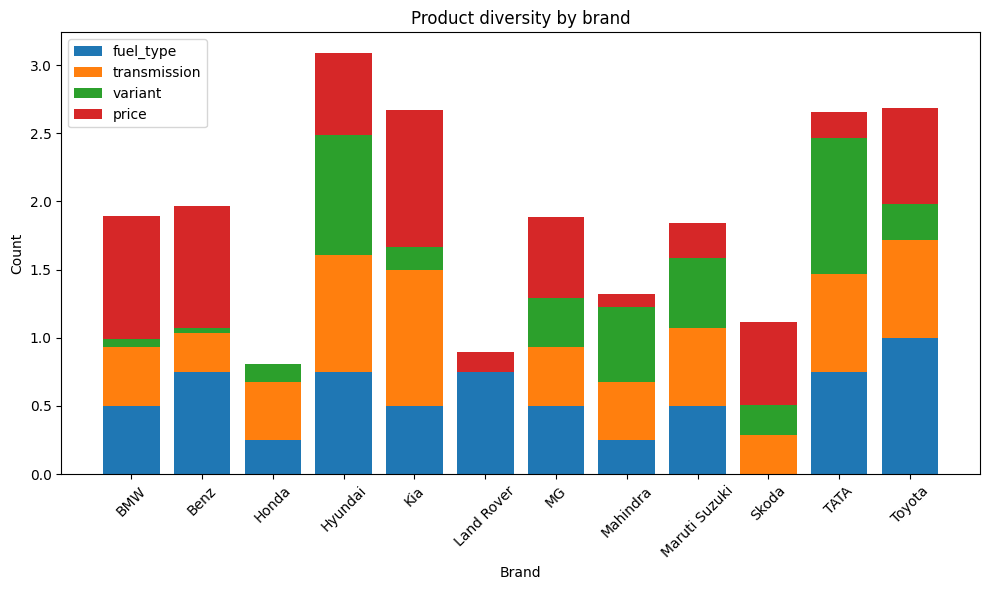

In [236]:
plt.figure(figsize = (10,6))
plt.bar(diversity_normalisation['brand'], diversity_normalisation['fuel_type'], label="fuel_type")
plt.bar(diversity_normalisation['brand'], diversity_normalisation['transmission'], bottom=diversity_normalisation['fuel_type'], label='transmission')
plt.bar(diversity_normalisation['brand'], diversity_normalisation['variant'], bottom=diversity_normalisation['fuel_type'] + diversity_normalisation['transmission'], label='variant')
plt.bar(diversity_normalisation['brand'], diversity_normalisation['price'], bottom=diversity_normalisation['fuel_type'] + diversity_normalisation['transmission']+diversity_normalisation['variant'], label='price')

plt.xticks(rotation = 45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Product diversity by brand")
plt.legend()
plt.tight_layout()
plt.show()

# 2). Which car variants offer the best value for money (high mileage + decent BHP at low price)?
## Supports "value car" marketing or identifying budget hero products.

In [262]:
Car

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating,Value_Score
0,Maruti Suzuki,Fronx,Sigma 1.2L MT,1197.0,Petrol,7.54,Manual,21.79,89.0,4.5,257.202918
1,Maruti Suzuki,Fronx,Delta 1.2L MT,1197.0,Petrol,8.40,Manual,21.79,89.0,4.5,230.870238
2,Maruti Suzuki,Fronx,Sigma 1.2 CNG,1197.0,CNG,8.49,Manual,28.51,76.0,4.5,255.213192
3,Maruti Suzuki,Fronx,Delta Plus 1.2L MT,1197.0,Petrol,8.80,Manual,21.79,89.0,4.5,220.376136
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5,228.900000
...,...,...,...,...,...,...,...,...,...,...,...
1364,Honda,Amaze 2nd Gen,VX 1.2 MT 2024,1199.0,Petrol,9.07,Manual,18.60,89.0,4.3,182.513782
1365,Honda,Amaze 2nd Gen,Elite Edition MT,1199.0,Petrol,9.17,Manual,18.60,89.0,4.3,180.523446
1366,Honda,Amaze 2nd Gen,VX 1.2 CVT,1199.0,Petrol,9.84,Automatic (CVT),18.30,89.0,4.3,165.518293
1367,Honda,Amaze 2nd Gen,VX 1.2 CVT 2024,1199.0,Petrol,9.89,Automatic (CVT),18.30,89.0,4.3,164.681496


In [4]:
# calculating Value_score and assigning it to dataset
Car["Value_Score"] = (Car["Mileage_kmpl/kmkg(cng)"]* Car["Bhp"])/Car["Price_in_lakh"]

In [5]:
# Sorting Value_Score column in descending order
top_value_cars = Car.sort_values("Value_Score",ascending = False)

In [6]:
top_value_cars.describe()

,CC,Price_in_lakh,Mileage_kmpl/kmkg(cng),Bhp,Rating,Value_Score
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,1406.787436,17.428795,43.908882,125.287290,4.560628,337.210094
std,532.529534,12.508804,98.586870,44.770362,0.186707,728.708871
min,17.300000,4.230000,6.900000,41.000000,2.600000,20.425626
25%,1197.000000,10.150000,16.000000,89.000000,4.500000,120.784643
50%,1462.000000,14.830000,18.200000,114.000000,4.600000,151.683767
75%,1498.000000,19.990000,20.650000,158.000000,4.700000,201.439206
max,2999.000000,99.400000,663.000000,421.000000,5.000000,5173.123660


In [10]:
# Filtering top cars which are greater then its bhp threshold (25%)
top_value_cars= top_value_cars[top_value_cars["Bhp"]>89]
top_value_cars.head(10)

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating,Value_Score
612,TATA,Nexon EV,Creative 45,45.0,Electric,13.99,Automatic,489.0,148.0,4.4,5173.123660
615,TATA,Nexon EV,Fearless 45,45.0,Electric,14.99,Automatic,489.0,148.0,4.4,4828.018679
616,TATA,Nexon EV,Empowered 45,45.0,Electric,15.99,Automatic,489.0,148.0,4.4,4526.078799
1314,MG,ZS EV,Executive,50.3,Electric,16.48,Automatic,461.0,154.0,4.2,4307.888350
645,TATA,Curvv EV,Accomplished,55.0,Electric,19.25,Automatic,502.0,165.0,4.4,4302.857143
617,TATA,Nexon EV,Empowered Plus 45,45.0,Electric,16.99,Automatic,489.0,148.0,4.4,4259.682166
618,TATA,Nexon EV,Empowered Plus 45 Red Dark Edition,45.0,Electric,17.19,Automatic,489.0,148.0,4.4,4210.122164
647,TATA,Curvv EV,Accomplished Plus S,55.0,Electric,19.99,Automatic,502.0,165.0,4.4,4143.571786
1315,MG,ZS EV,Excite Pro,50.3,Electric,17.73,Automatic,461.0,154.0,4.2,4004.173717
626,TATA,Punch EV,Adventure Long Range 3.3,35.0,Electric,12.84,Automatic,421.0,120.0,4.5,3934.579439


In [333]:
# Extracting top 10 Value for money cars and adding brand, model and price to variant column 
top_10 = top_value_cars.head(10)
top_10["Variant"] = top_10["Brand"] + " -- " + top_10["Variant"] 
#top_10["Variant"]=top_10["Variant"].apply(lambda x: re.sub(r" \(\₹\d+\.\d+L","",x))


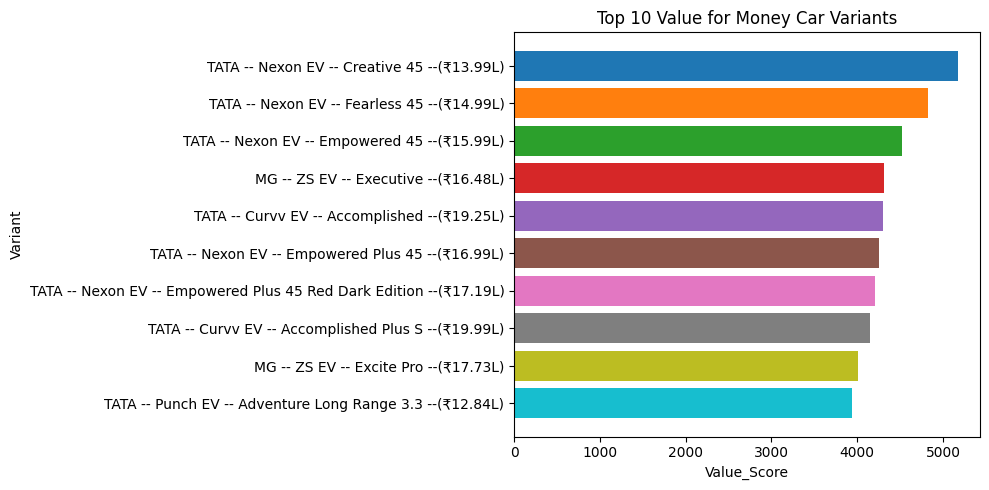

In [332]:
# Bar plot
colors = plt.cm.tab10(range(len(top_10)))

plt.figure(figsize = (10,5))
plt.barh(top_10["Variant"],top_10["Value_Score"],color = colors)
plt.title("Top 10 Value for Money Car Variants")
plt.xlabel("Value_Score")
plt.ylabel("Variant")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3). Which car models have the most balanced configuration (moderate price, mileage, and performance)?
# Useful for identifying core mid-segment products.

In [3]:
Car.describe()

,CC,Price_in_lakh,Mileage_kmpl/kmkg(cng),Bhp,Rating
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,1406.787436,17.428795,43.908882,125.287290,4.560628
std,532.529534,12.508804,98.586870,44.770362,0.186707
min,17.300000,4.230000,6.900000,41.000000,2.600000
25%,1197.000000,10.150000,16.000000,89.000000,4.500000
50%,1462.000000,14.830000,18.200000,114.000000,4.600000
75%,1498.000000,19.990000,20.650000,158.000000,4.700000
max,2999.000000,99.400000,663.000000,421.000000,5.000000


In [4]:
median = Car["Price_in_lakh"].median()

In [5]:
a = (Car["Price_in_lakh"]>median - median*10/100)  & (Car["Price_in_lakh"] < median + median*10/100) 



In [6]:
median_mileage = Car["Mileage_kmpl/kmkg(cng)"].median()

In [7]:
b = (Car["Mileage_kmpl/kmkg(cng)"]>median_mileage - median_mileage*10/100) & (Car["Mileage_kmpl/kmkg(cng)"] <median_mileage+ median_mileage*10/100)

In [8]:
median_bhp = Car["Bhp"].median()

In [9]:
c = (Car["Bhp"]>median_bhp-median_bhp*10/100) & (Car["Bhp"]<median_bhp+median_bhp*10/100)

In [10]:
balanced_cars = Car[a&b&c]

In [11]:
balanced_cars = balanced_cars.sort_values("Price_in_lakh")
#balanced_cars


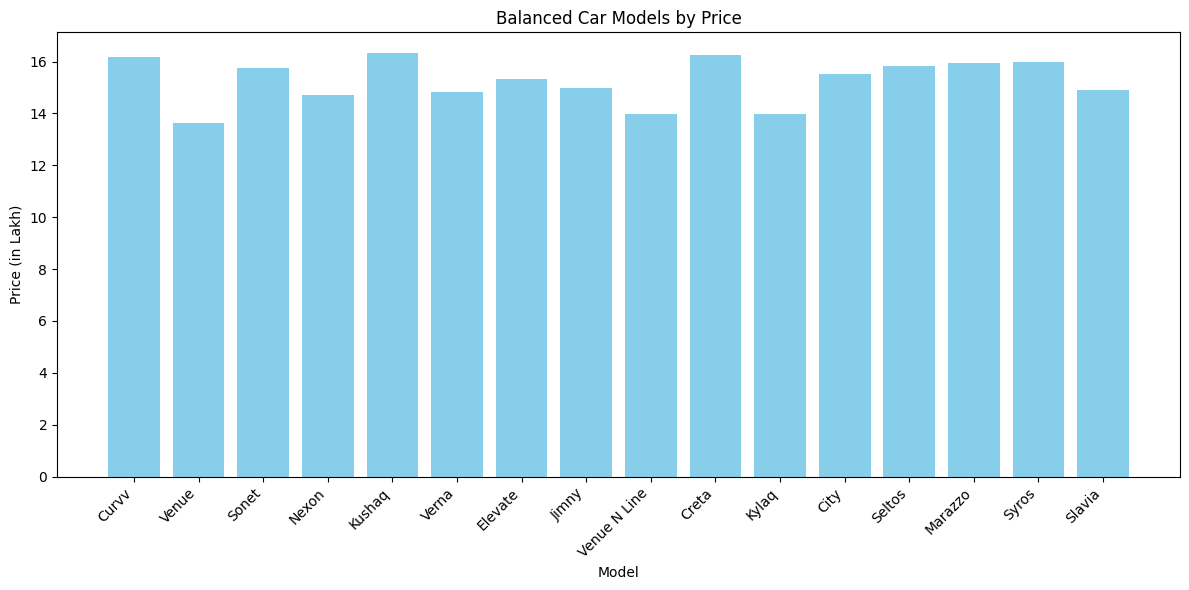

In [12]:
plt.figure(figsize = (12,6))
plt.bar(balanced_cars["Model"],balanced_cars["Price_in_lakh"],color = "skyblue")
plt.xticks(rotation = 45,ha = "right")
plt.title("Balanced Car Models by Price")
plt.xlabel("Model")
plt.ylabel("Price (in Lakh)")
plt.tight_layout()
plt.show()

# 4). Are certain brands underpricing high-performance variants compared to competitors?
# Can be used to identify pricing gaps or opportunities for price hikes. (>75 percentile of Bhp with lower price)

In [29]:
Car["Bhp"].describe()

count    1369.000000
mean      125.287290
std        44.770362
min        41.000000
25%        89.000000
50%       114.000000
75%       158.000000
max       421.000000
Name: Bhp, dtype: float64

In [33]:
high_bhp_cars = Car[Car["Bhp"]>158]

In [39]:
high_bhp_cars["price_per_bhp"] = high_bhp_cars["Price_in_lakh"]/high_bhp_cars["Bhp"]

/var/folders/j7/0v65189d0wvb271f8y24c1l40000gn/T/ipykernel_996/1737373148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_bhp_cars["price_per_bhp"] = high_bhp_cars["Price_in_lakh"]/high_bhp_cars["Bhp"]


In [40]:
high_bhp_cars

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating,price_per_bhp
206,Mahindra,XUV700,MX MT 7 STR,1997.0,Petrol,14.49,Manual,16.00,197.0,4.6,0.073553
208,Mahindra,XUV700,MX MT 7 STR (ESP),1997.0,Petrol,14.99,Manual,16.00,197.0,4.6,0.076091
210,Mahindra,XUV700,AX5 Select MT 7 STR,1997.0,Petrol,16.89,Manual,16.00,197.0,4.6,0.085736
211,Mahindra,XUV700,AX5 Select MT 7 STR (ESP),1997.0,Petrol,17.39,Manual,16.00,197.0,4.6,0.088274
212,Mahindra,XUV700,AX5 Select MT 7 STR,2184.0,Diesel,17.74,Manual,14.60,182.0,4.6,0.097473
...,...,...,...,...,...,...,...,...,...,...,...
1288,MG,Hector Plus,Sharp Pro Snowstorm 2.0 Turbo MT 7 STR,1956.0,Diesel,23.20,Manual,15.58,168.0,4.4,0.138095
1289,MG,Hector Plus,Sharp Pro Blackstorm 2.0 Turbo 7 STR,1956.0,Diesel,23.22,Manual,15.58,168.0,4.4,0.138214
1290,MG,Hector Plus,Sharp Pro 2.0 Turbo 6 STR Dual Tone,1956.0,Diesel,23.31,Manual,15.58,168.0,4.4,0.138750
1291,MG,Hector Plus,Sharp Pro Snowstorm 2.0 Turbo MT 6 STR,1956.0,Diesel,23.41,Manual,15.58,168.0,4.4,0.139345


In [43]:
high_bhp_low_price_brands = high_bhp_cars.groupby("Brand")["price_per_bhp"].mean()

In [44]:
high_bhp_low_price_brands

Brand
BMW           0.277500
Benz          0.306853
Hyundai       0.159833
Kia           0.270941
Land Rover    0.338840
MG            0.174758
Mahindra      0.113109
Skoda         0.237761
TATA          0.131987
Toyota        0.182280
Name: price_per_bhp, dtype: float64

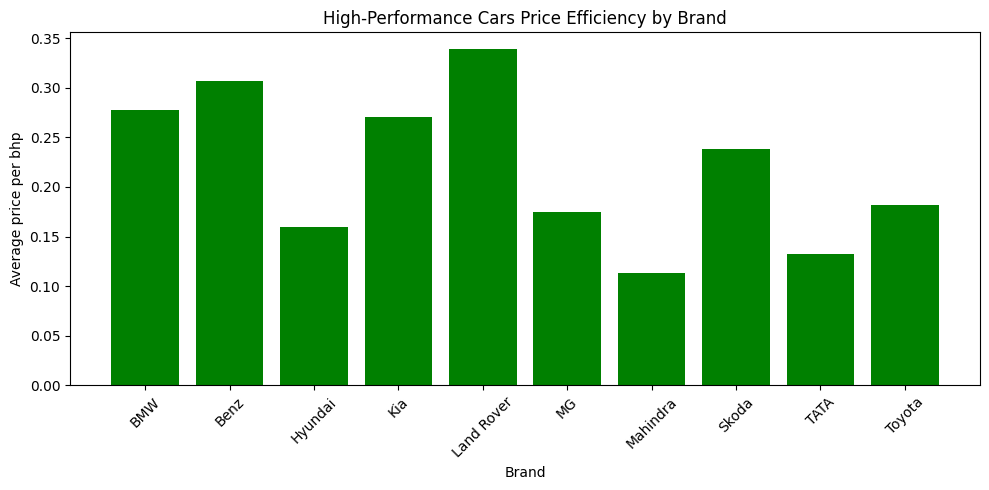

In [119]:
plt.figure(figsize = (10,5))
plt.bar(high_bhp_low_price_brands.index,high_bhp_low_price_brands.values, color = 'green')
plt.title("High-Performance Cars Price Efficiency by Brand")
plt.xlabel("Brand")
plt.ylabel("Average price per bhp")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [120]:
# plt.figure(figsize = (10,5))
# sns.scatterplot(data = pd.DataFrame(high_bhp_low_price_brands), y = high_bhp_low_price_brands.values,x = high_bhp_low_price_brands.index,color = "blue")

# 5).Which brands dominate the ₹8–₹12 lakh price band?
# Helps identify price-sensitive battleground segments.

In [89]:
Car

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating
0,Maruti Suzuki,Fronx,Sigma 1.2L MT,1197.0,Petrol,7.54,Manual,21.79,89.0,4.5
1,Maruti Suzuki,Fronx,Delta 1.2L MT,1197.0,Petrol,8.40,Manual,21.79,89.0,4.5
2,Maruti Suzuki,Fronx,Sigma 1.2 CNG,1197.0,CNG,8.49,Manual,28.51,76.0,4.5
3,Maruti Suzuki,Fronx,Delta Plus 1.2L MT,1197.0,Petrol,8.80,Manual,21.79,89.0,4.5
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5
...,...,...,...,...,...,...,...,...,...,...
1364,Honda,Amaze 2nd Gen,VX 1.2 MT 2024,1199.0,Petrol,9.07,Manual,18.60,89.0,4.3
1365,Honda,Amaze 2nd Gen,Elite Edition MT,1199.0,Petrol,9.17,Manual,18.60,89.0,4.3
1366,Honda,Amaze 2nd Gen,VX 1.2 CVT,1199.0,Petrol,9.84,Automatic (CVT),18.30,89.0,4.3
1367,Honda,Amaze 2nd Gen,VX 1.2 CVT 2024,1199.0,Petrol,9.89,Automatic (CVT),18.30,89.0,4.3


In [93]:
price_8_12 = Car[(Car["Price_in_lakh"]>8) & (Car["Price_in_lakh"]<12)]

In [159]:
most_dominant_model_8_12 = price_8_12.groupby("Brand")["Variant"].nunique()
most_dominant_model_8_12

Brand
Honda            13
Hyundai          77
Kia              16
MG                5
Mahindra         20
Maruti Suzuki    51
Skoda            10
TATA             96
Toyota           20
Name: Variant, dtype: int64

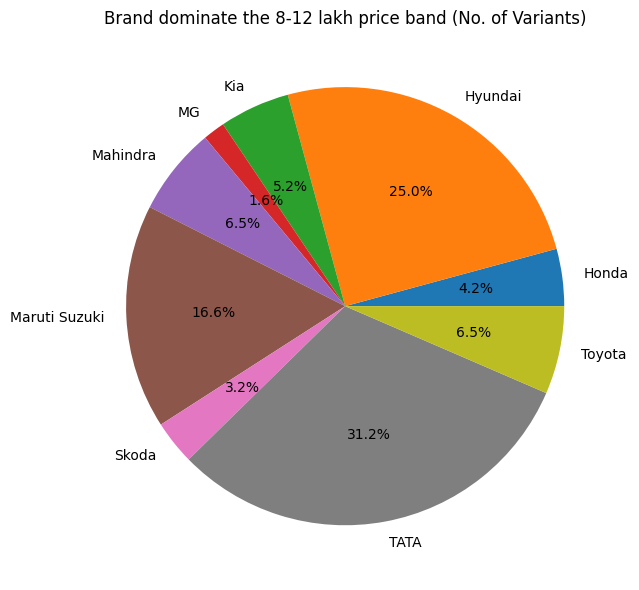

In [161]:
plt.figure(figsize = (8,6))
plt.pie(most_dominant_model_8_12.values,labels = most_dominant_model_8_12.index,autopct = "%1.1f%%")
plt.title("Brand dominate the 8-12 lakh price band (No. of Variants)")
plt.tight_layout()
plt.show()

# 6). What is the average price difference between manual and automatic variants within the same model?
# Useful for pricing strategy between transmissions.

In [13]:
different = Car
different["Transmission"].unique()

array(['Manual', 'Automatic (AMT)', 'Automatic (TC)', 'Automatic (CVT)',
       'Automatic (e-CVT)', 'Automatic(TC)', 'Automatic (DCT)',
       'Automatic', 'Automatic(AMT)', 'Automatic(DCT)',
       'Automatic(e-CVT)', 'Clutchless Manual (IMT)', 'Automatic(CVT)'],
      dtype=object)

In [14]:
different["Transmission"]= different["Transmission"].apply(lambda x:"Automatic" if 'Auto' in x or "TC" in x or "CVT" in x or "e-CVT" in x or "DCT" in x or "AMT" in x else "Manual")


In [15]:
different["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
manual_automatic_only = different[(different["Transmission"] == "Manual") | (different["Transmission"] == "Automatic")]
manual_automatic_price = manual_automatic_only.groupby(["Brand","Model","Transmission"])["Price_in_lakh"].mean()
unique_model = pd.DataFrame(manual_automatic_price).reset_index()

In [17]:
unique_model

,Brand,Model,Transmission,Price_in_lakh
0,BMW,2 Series,Automatic,46.220000
1,BMW,3 Series LWB,Automatic,63.200000
2,BMW,5 Series,Automatic,72.900000
3,BMW,M340i,Automatic,74.900000
4,BMW,X1,Automatic,52.300000
...,...,...,...,...
167,Toyota,Rumion,Manual,11.540000
168,Toyota,Urban Cruiser Hyryder,Automatic,18.016364
169,Toyota,Urban Cruiser Hyryder,Manual,14.488571
170,Toyota,Urban Cruiser Taisor,Automatic,11.328000


In [18]:
pivot_table = unique_model.pivot(index = "Model",columns = "Transmission", values = "Price_in_lakh").reset_index()

In [19]:
pivot_table = pivot_table.dropna(subset = ["Manual","Automatic"])

In [20]:
pivot_table.isna().sum()

Transmission
Model        0
Automatic    0
Manual       0
dtype: int64

In [21]:
pivot_table["Difference"] = pivot_table["Automatic"] - pivot_table["Manual"]

In [22]:
pivot_table.drop(index = 104,inplace = True)

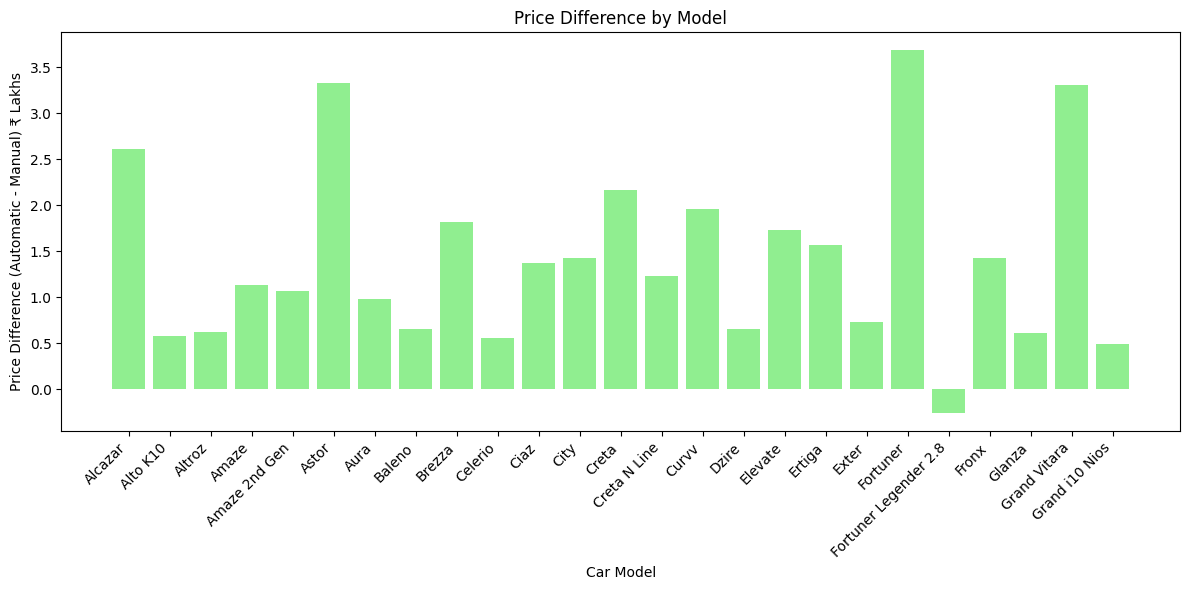

In [24]:
plt.figure(figsize = (12,6))
plt.bar(data = pivot_table.head(25), x = "Model", height = "Difference",color = "lightgreen")
plt.title("Price Difference by Model")
plt.xlabel("Car Model")
plt.ylabel("Price Difference (Automatic - Manual) ₹ Lakhs")
plt.xticks(rotation = 45,ha = "right")
plt.tight_layout()
plt.show()

# 7). Do higher CC or BHP cars always cost more, or are there pricing inefficiencies?
# Can be used to realign pricing with perceived value.


In [24]:
Car


,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating,Value_Score
0,Maruti Suzuki,Fronx,Sigma 1.2L MT,1197.0,Petrol,7.54,Manual,21.79,89.0,4.5,257.202918
1,Maruti Suzuki,Fronx,Delta 1.2L MT,1197.0,Petrol,8.40,Manual,21.79,89.0,4.5,230.870238
2,Maruti Suzuki,Fronx,Sigma 1.2 CNG,1197.0,CNG,8.49,Manual,28.51,76.0,4.5,255.213192
3,Maruti Suzuki,Fronx,Delta Plus 1.2L MT,1197.0,Petrol,8.80,Manual,21.79,89.0,4.5,220.376136
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5,228.900000
...,...,...,...,...,...,...,...,...,...,...,...
1364,Honda,Amaze 2nd Gen,VX 1.2 MT 2024,1199.0,Petrol,9.07,Manual,18.60,89.0,4.3,182.513782
1365,Honda,Amaze 2nd Gen,Elite Edition MT,1199.0,Petrol,9.17,Manual,18.60,89.0,4.3,180.523446
1366,Honda,Amaze 2nd Gen,VX 1.2 CVT,1199.0,Petrol,9.84,Automatic (CVT),18.30,89.0,4.3,165.518293
1367,Honda,Amaze 2nd Gen,VX 1.2 CVT 2024,1199.0,Petrol,9.89,Automatic (CVT),18.30,89.0,4.3,164.681496


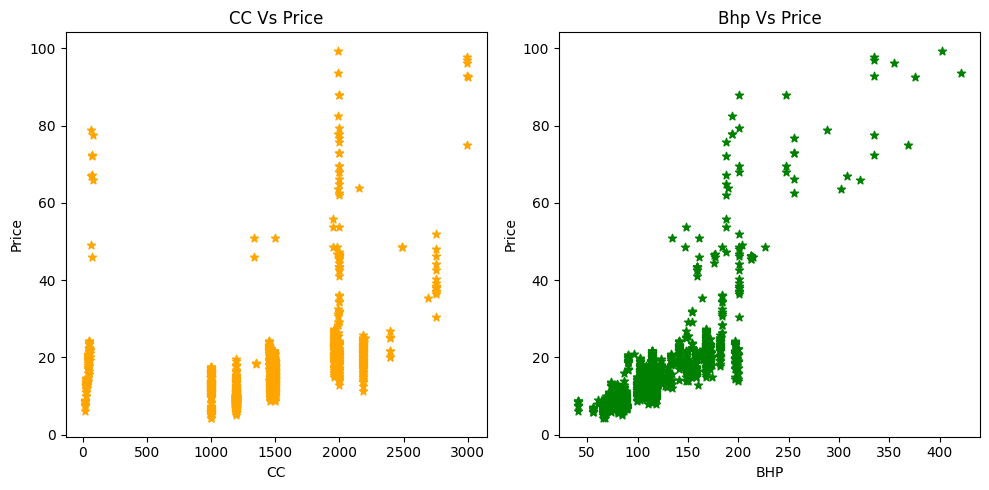

In [62]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
axes[0].scatter(x = Car["CC"],y = Car["Price_in_lakh"],color = "Orange",marker = "*")
axes[0].set_title("CC Vs Price")
axes[0].set_xlabel("CC")
axes[0].set_ylabel("Price")




axes[1].scatter(x = Car["Bhp"], y = Car["Price_in_lakh"],marker = "*",color = "green")
axes[1].set_title("Bhp Vs Price")
axes[1].set_xlabel("BHP")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

# 8).Which car variants are ideal for urban commuters (automatic, high mileage, compact engine)?
# Helps target city users with specific ad campaigns.

In [64]:
Car

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating
0,Maruti Suzuki,Fronx,Sigma 1.2L MT,1197.0,Petrol,7.54,Manual,21.79,89.0,4.5
1,Maruti Suzuki,Fronx,Delta 1.2L MT,1197.0,Petrol,8.40,Manual,21.79,89.0,4.5
2,Maruti Suzuki,Fronx,Sigma 1.2 CNG,1197.0,CNG,8.49,Manual,28.51,76.0,4.5
3,Maruti Suzuki,Fronx,Delta Plus 1.2L MT,1197.0,Petrol,8.80,Manual,21.79,89.0,4.5
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5
...,...,...,...,...,...,...,...,...,...,...
1364,Honda,Amaze 2nd Gen,VX 1.2 MT 2024,1199.0,Petrol,9.07,Manual,18.60,89.0,4.3
1365,Honda,Amaze 2nd Gen,Elite Edition MT,1199.0,Petrol,9.17,Manual,18.60,89.0,4.3
1366,Honda,Amaze 2nd Gen,VX 1.2 CVT,1199.0,Petrol,9.84,Automatic (CVT),18.30,89.0,4.3
1367,Honda,Amaze 2nd Gen,VX 1.2 CVT 2024,1199.0,Petrol,9.89,Automatic (CVT),18.30,89.0,4.3


In [98]:
automatic = Car[Car["Transmission"].isin(['Automatic (AMT)','Automatic (TC)','Automatic (CVT)','Automatic (e-CVT)','Automatic(TC)','Automatic (DCT)','Automatic','Automatic(AMT)','Automatic(DCT)','Automatic(e-CVT)','Automatic(CVT)'])] 




In [99]:
automatic["Transmission"].unique()

array(['Automatic (AMT)', 'Automatic (TC)', 'Automatic (CVT)',
       'Automatic (e-CVT)', 'Automatic(TC)', 'Automatic (DCT)',
       'Automatic', 'Automatic(AMT)', 'Automatic(DCT)',
       'Automatic(e-CVT)', 'Automatic(CVT)'], dtype=object)

In [101]:
# array(['Manual', 'Automatic (AMT)', 'Automatic (TC)', 'Automatic (CVT)',
#        'Automatic (e-CVT)', 'Automatic(TC)', 'Automatic (DCT)',
#        'Automatic', 'Automatic(AMT)', 'Automatic(DCT)',
#        'Automatic(e-CVT)', 'Clutchless Manual (IMT)', 'Automatic(CVT)'],
#       dtype=object)

In [113]:
Car["Mileage_kmpl/kmkg(cng)"].describe()

count    1369.000000
mean       43.887232
std        98.594888
min         0.000000
25%        16.000000
50%        18.200000
75%        20.650000
max       663.000000
Name: Mileage_kmpl/kmkg(cng), dtype: float64

In [115]:
automatic_city_cars = automatic[automatic["Mileage_kmpl/kmkg(cng)"]>= Car["Mileage_kmpl/kmkg(cng)"].quantile(0.75)]

In [116]:
automatic_city_cars

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5
6,Maruti Suzuki,Fronx,Delta Plus 1.2L AGS,1197.0,Petrol,9.30,Automatic (AMT),22.89,89.0,4.5
8,Maruti Suzuki,Fronx,Delta Plus (O) 1.2L AGS,1197.0,Petrol,9.46,Automatic (AMT),22.89,89.0,4.5
33,Maruti Suzuki,Dzire,VXi AMT,1197.0,Petrol,8.34,Automatic (AMT),25.71,80.0,4.7
36,Maruti Suzuki,Dzire,ZXi AMT,1197.0,Petrol,9.44,Automatic (AMT),25.71,80.0,4.7
...,...,...,...,...,...,...,...,...,...,...
1317,MG,ZS EV,Exclusive Plus Dual Tone Iconic Ivory,50.3,Electric,22.55,Automatic,461.00,154.0,4.2
1318,MG,ZS EV,100-Year Edition,50.3,Electric,22.55,Automatic,461.00,154.0,4.2
1319,MG,ZS EV,Essence Dark Grey,50.3,Electric,23.50,Automatic,461.00,154.0,4.2
1320,MG,ZS EV,Essence Dual Tone Iconic Ivory,50.3,Electric,23.70,Automatic,461.00,154.0,4.2


In [118]:
Car["CC"].describe()

count    1369.000000
mean     1406.787436
std       532.529534
min        17.300000
25%      1197.000000
50%      1462.000000
75%      1498.000000
max      2999.000000
Name: CC, dtype: float64

In [122]:
automatic_city_cars = automatic_city_cars[automatic_city_cars["CC"]<= Car["CC"].quantile(0.25)]

In [123]:
automatic_city_cars

,Brand,Model,Variant,CC,Fuel_Type,Price_in_lakh,Transmission,Mileage_kmpl/kmkg(cng),Bhp,Rating
4,Maruti Suzuki,Fronx,Delta 1.2L AGS,1197.0,Petrol,8.90,Automatic (AMT),22.89,89.0,4.5
6,Maruti Suzuki,Fronx,Delta Plus 1.2L AGS,1197.0,Petrol,9.30,Automatic (AMT),22.89,89.0,4.5
8,Maruti Suzuki,Fronx,Delta Plus (O) 1.2L AGS,1197.0,Petrol,9.46,Automatic (AMT),22.89,89.0,4.5
33,Maruti Suzuki,Dzire,VXi AMT,1197.0,Petrol,8.34,Automatic (AMT),25.71,80.0,4.7
36,Maruti Suzuki,Dzire,ZXi AMT,1197.0,Petrol,9.44,Automatic (AMT),25.71,80.0,4.7
...,...,...,...,...,...,...,...,...,...,...
1316,MG,ZS EV,Exclusive Plus Dark Grey,50.3,Electric,22.35,Automatic,461.00,154.0,4.2
1317,MG,ZS EV,Exclusive Plus Dual Tone Iconic Ivory,50.3,Electric,22.55,Automatic,461.00,154.0,4.2
1318,MG,ZS EV,100-Year Edition,50.3,Electric,22.55,Automatic,461.00,154.0,4.2
1319,MG,ZS EV,Essence Dark Grey,50.3,Electric,23.50,Automatic,461.00,154.0,4.2


In [126]:
sorted_by_price_city_commuters = automatic_city_cars.sort_values(by = "Price_in_lakh", ascending = True)

In [202]:
#sorted_by_price_city_commuters["Model_price"] = sorted_by_price_city_commuters["Model"]  + " - (RS." + sorted_by_price_city_commuters["Price_in_lakh"].astype(str) + "L)"


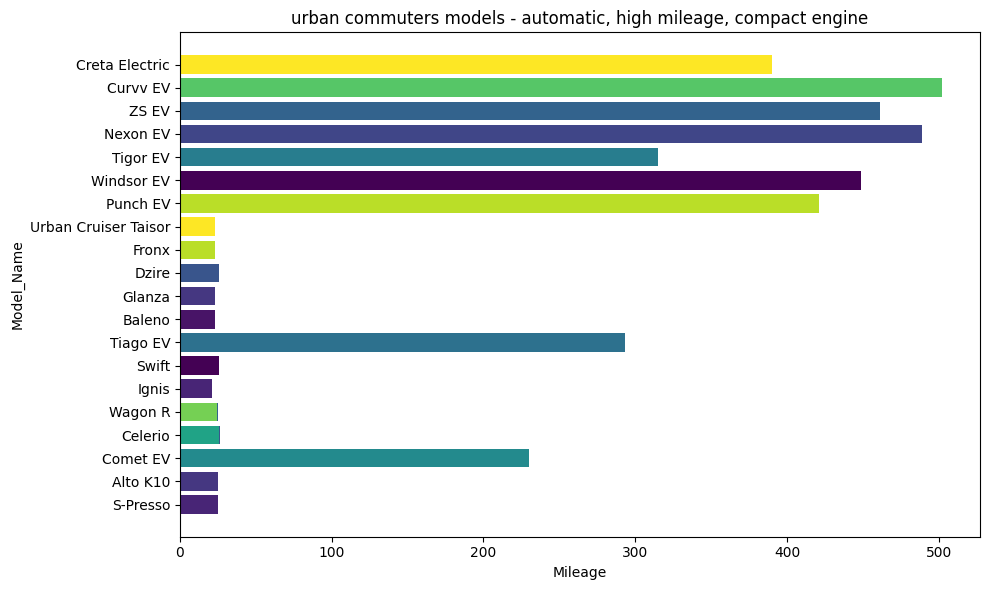

In [206]:
colors = plt.cm.viridis(np.linspace(0,1,20))
plt.figure(figsize = (10,6))
plt.barh(data = sorted_by_price_city_commuters.head(100), y= "Model", width = "Mileage_kmpl/kmkg(cng)", color = colors)
plt.title("urban commuters models - automatic, high mileage, compact engine")
plt.xlabel("Mileage")
plt.ylabel("Model_Name")
plt.tight_layout()
plt.show()



# 9).Which brand offers the best overall ratings in the ₹10–₹15 lakh segment?
# Supports advertising/branding with “best rated in class.”

In [43]:
filter_1_15 = Car[(Car["Price_in_lakh"]>=10) & (Car["Price_in_lakh"]<=15)]

In [47]:
brand_rating = filter_1_15.groupby("Brand")["Rating"].mean().sort_values(ascending = False)

In [49]:
brand_rating.values

array([4.65616438, 4.65185185, 4.62105263, 4.61860465, 4.57894737,
       4.54273504, 4.45862069, 4.36363636, 4.32      ])

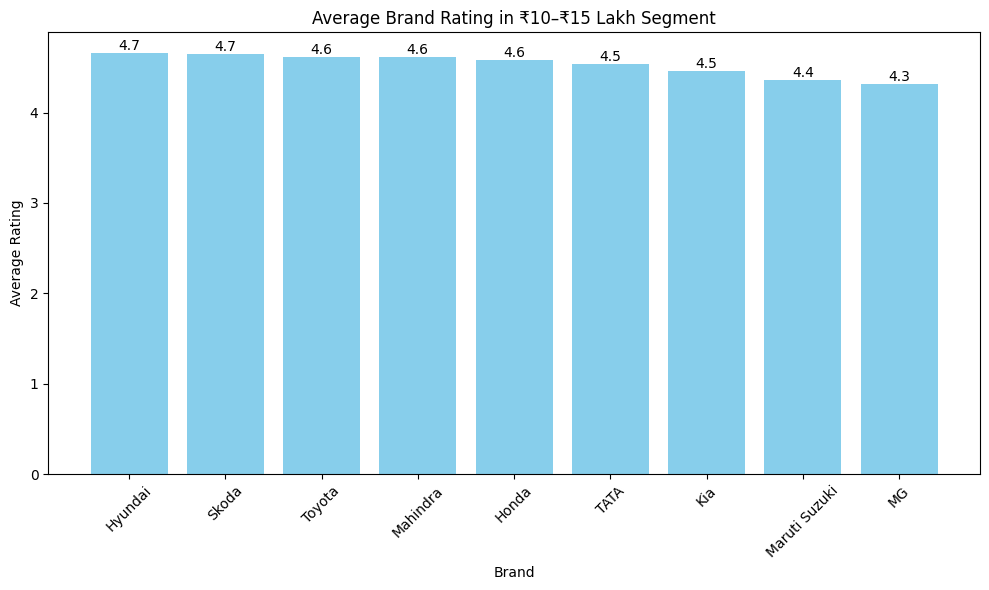

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(brand_rating.index, brand_rating.values, color='skyblue')
ax.bar_label(bars, fmt='%.1f')  


plt.title("Average Brand Rating in ₹10–₹15 Lakh Segment")
plt.xticks(rotation = 45)
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


# 10). Is there a brand that consistently offers higher mileage across its lineup than competitors?
# Can claim segment leadership in efficiency.

In [188]:
mileage = Car[~Car["Fuel_Type"].isin(["Electric","CNG"])]
mileage_fuel = mileage.groupby("Brand")["mileage"].mean()
mileage_fuel = mileage_fuel.sort_values(ascending = False)

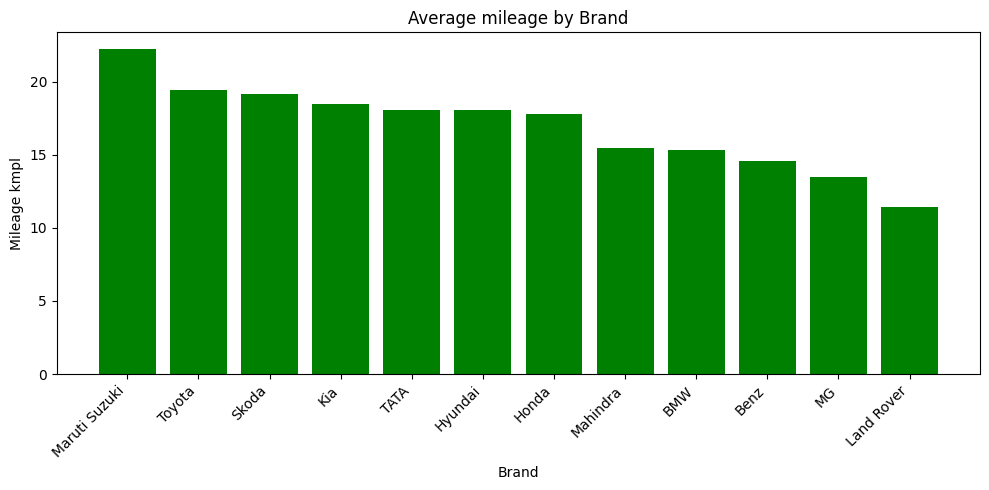

In [198]:
plt.figure(figsize= (10,5))
plt.bar(mileage_fuel.index,mileage_fuel.values,color = "green")
plt.xticks(rotation = 45,ha = "right")
plt.title("Average mileage by Brand")
plt.xlabel("Brand")
plt.ylabel("Mileage kmpl")
plt.tight_layout()
plt.show()

# 11). Which fuel types are being offered most frequently by each brand?
# Indicates brand's adaptation to EV/CNG trends or fuel economy focus.

In [157]:
fuel_count = Car.groupby("Brand")["Fuel_Type"].value_counts().reset_index(name = "count")

In [158]:
fuel_count

,Brand,Fuel_Type,count
0,BMW,Petrol,14
1,BMW,Diesel,5
2,BMW,Electric,4
3,Benz,Petrol,8
4,Benz,Diesel,5
5,Benz,Electric,3
6,Benz,Mild Hybrid(Electric + Petrol),1
7,Honda,Petrol,47
8,Honda,Hybrid (Electric + Petrol),1
9,Hyundai,Petrol,186


In [159]:
pivot_table = fuel_count.pivot(index = "Brand",columns = "Fuel_Type",values = "count").fillna(0)

In [160]:
pivot_table["Hybrid (Electric + Petrol)"] = pivot_table["Hybrid (Electric + Petrol)"] + pivot_table["Hybrid(Electric+Petrol)"] + pivot_table["Mild Hybrid(Electric + Petrol)"]

In [161]:
pivot_table.drop(columns = ["Hybrid(Electric+Petrol)","Mild Hybrid(Electric + Petrol)"],inplace = True)

In [162]:
pivot_fuel = pivot_table

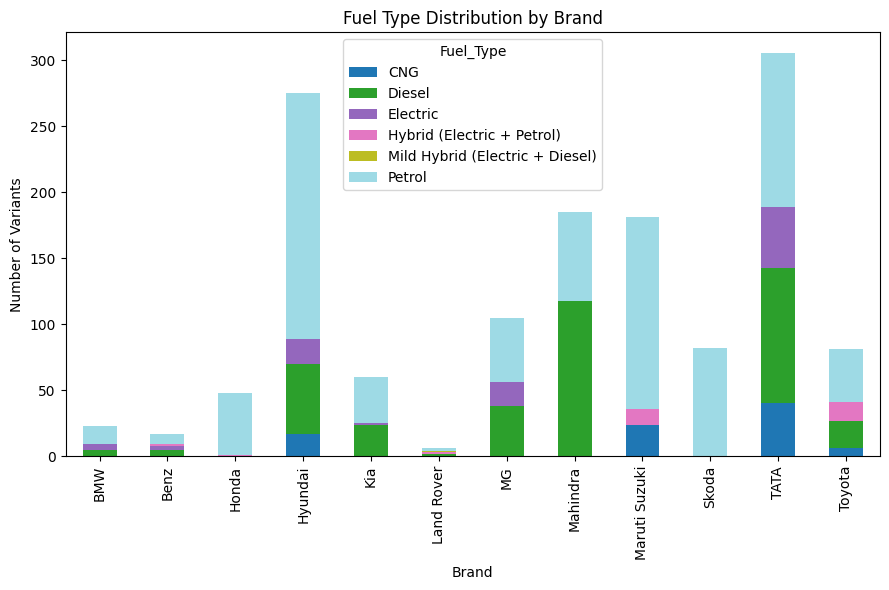

In [176]:

pivot_fuel.plot(kind = "bar",stacked=True, figsize=(9, 6), colormap="tab20")
plt.title("Fuel Type Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Variants")
plt.tight_layout()
plt.show()